## Reading and Understanding Data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [42]:
# Reading the data

retail = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
retail.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [43]:
retail.shape

(541909, 8)

In [44]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [45]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

In [46]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [47]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [48]:
retail.CustomerID.unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [49]:
temp = retail[retail["CustomerID"].isin([12346.0])]

In [50]:
temp = retail[retail["CustomerID"].isin([18256.0])]

In [51]:
temp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
37878,C539486,22600,CHRISTMAS RETROSPOT STAR WOOD,-12,20-12-2010 08:27,0.85,18256.0,United Kingdom
37879,C539486,22603,CHRISTMAS RETROSPOT TREE WOOD,-11,20-12-2010 08:27,0.85,18256.0,United Kingdom
37880,C539486,22336,DOVE DECORATION PAINTED ZINC,-23,20-12-2010 08:27,0.65,18256.0,United Kingdom
37881,C539486,22339,CHRISTMAS TREE PAINTED ZINC,-24,20-12-2010 08:27,0.65,18256.0,United Kingdom


In [52]:
temp.shape

(4, 8)

In [53]:
# Droping rows having missing values
# Though Customer ID in itself is not a value which is contributing but based on the customerID grouping is done to find RFM value, so we have to drop all rows for which we don't have customerID
retail = retail.dropna()
retail.shape

(406829, 8)

In [54]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

## Data Preparation

In [55]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [56]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [57]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [58]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [59]:
retail['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
7        2010-12-01 08:28:00
8        2010-12-01 08:28:00
9        2010-12-01 08:34:00
10       2010-12-01 08:34:00
11       2010-12-01 08:34:00
12       2010-12-01 08:34:00
13       2010-12-01 08:34:00
14       2010-12-01 08:34:00
15       2010-12-01 08:34:00
16       2010-12-01 08:34:00
17       2010-12-01 08:34:00
18       2010-12-01 08:34:00
19       2010-12-01 08:34:00
20       2010-12-01 08:34:00
21       2010-12-01 08:34:00
22       2010-12-01 08:34:00
23       2010-12-01 08:34:00
24       2010-12-01 08:34:00
25       2010-12-01 08:35:00
26       2010-12-01 08:45:00
27       2010-12-01 08:45:00
28       2010-12-01 08:45:00
29       2010-12-01 08:45:00
                 ...        
541879   2011-12-09 12:31:00
541880   2011-12-09 12:31:00
541881   2011-12-09 12:31:00
541882   2011-

In [60]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [61]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373 days 04:24:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373 days 04:24:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373 days 04:22:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373 days 04:22:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373 days 04:16:00


In [62]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [63]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [64]:
# Merge the dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [65]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.000000e+00,2,325
1,12347.0,4.310000e+03,182,1
2,12348.0,1.797240e+03,31,74
3,12349.0,1.757550e+03,73,18
4,12350.0,3.344000e+02,17,309
5,12352.0,1.545410e+03,95,35
6,12353.0,8.900000e+01,4,203
7,12354.0,1.079400e+03,58,231
8,12355.0,4.594000e+02,13,213
9,12356.0,2.811430e+03,59,22


There are 2 types of outliers and we will treat outliers as it can skew our dataset
- Statistical
- Domain specific

In [66]:
rfm['Amount']

0       0.000000e+00
1       4.310000e+03
2       1.797240e+03
3       1.757550e+03
4       3.344000e+02
5       1.545410e+03
6       8.900000e+01
7       1.079400e+03
8       4.594000e+02
9       2.811430e+03
10      6.207670e+03
11      1.168060e+03
12      6.245530e+03
13      2.662060e+03
14      1.899000e+02
15      5.154580e+03
16      5.520000e+02
17      1.313100e+03
18      3.206900e+02
19      1.689000e+02
20      3.545690e+03
21      1.887960e+03
22      1.298040e+03
23      3.646000e+02
24      7.429300e+02
25      4.554200e+02
26      1.628120e+03
27      4.008620e+03
28      8.502900e+02
29      2.720560e+03
            ...     
4342    2.507560e+03
4343    5.961000e+02
4344    7.830200e+02
4345    9.534000e+01
4346    3.429200e+02
4347    4.314720e+03
4348    5.266700e+02
4349    1.033000e+02
4350   -5.010000e+01
4351    2.265380e+03
4352    2.338600e+03
4353    2.595000e+03
4354    3.242400e+02
4355    1.494800e+02
4356    1.211080e+03
4357    8.015100e+02
4358    0.000

Text(0.5, 0, 'Attributes')

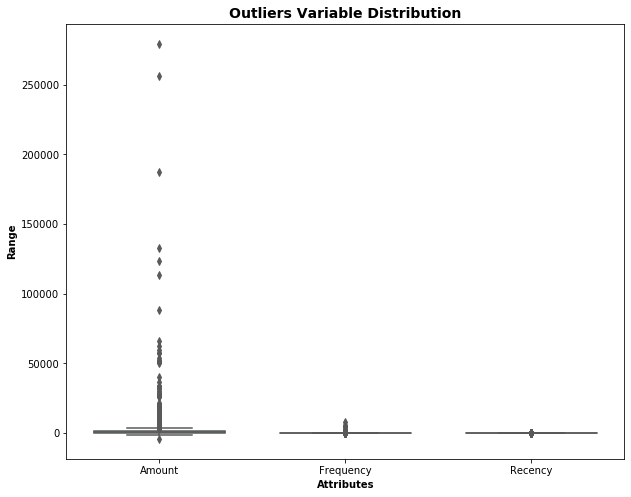

In [67]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient = "v", palette = "Set2", whis = 1.5, saturation = 1, width = 0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [68]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [69]:
rfm['Amount']

0       0.000000e+00
1       4.310000e+03
2       1.797240e+03
3       1.757550e+03
4       3.344000e+02
5       1.545410e+03
6       8.900000e+01
7       1.079400e+03
8       4.594000e+02
9       2.811430e+03
10      6.207670e+03
11      1.168060e+03
12      6.245530e+03
13      2.662060e+03
14      1.899000e+02
15      5.154580e+03
16      5.520000e+02
17      1.313100e+03
18      3.206900e+02
19      1.689000e+02
20      3.545690e+03
21      1.887960e+03
22      1.298040e+03
23      3.646000e+02
24      7.429300e+02
25      4.554200e+02
26      1.628120e+03
27      4.008620e+03
28      8.502900e+02
29      2.720560e+03
            ...     
4341    2.232490e+03
4342    2.507560e+03
4343    5.961000e+02
4344    7.830200e+02
4345    9.534000e+01
4346    3.429200e+02
4347    4.314720e+03
4348    5.266700e+02
4349    1.033000e+02
4350   -5.010000e+01
4351    2.265380e+03
4352    2.338600e+03
4353    2.595000e+03
4354    3.242400e+02
4355    1.494800e+02
4356    1.211080e+03
4357    8.015

Text(0.5, 0, 'Attributes')

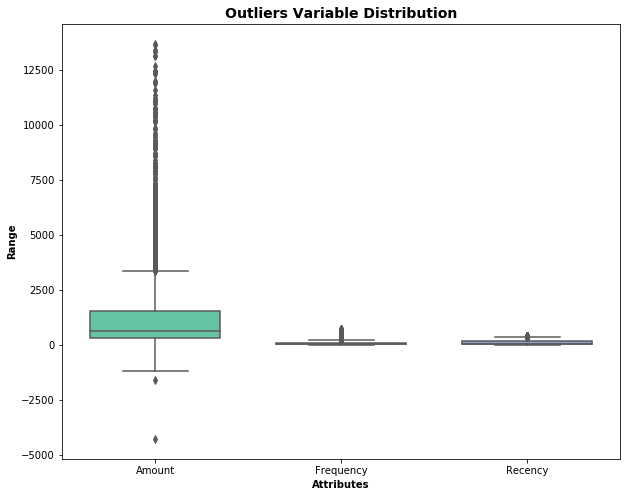

In [70]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient = "v", palette = "Set2", whis = 1.5, saturation = 1, width = 0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

### Rescaling the Attributes
It is extremely important to rescale the variables so that they have a comparable scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [71]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

C:\Users\shalga\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shalga\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(4293, 3)

In [72]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## [---------------------------------- Machine Learning Modeling ----------------------------------]

### K-Means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [73]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
kmeans.labels_

array([0, 3, 2, ..., 0, 2, 2])

### Finding the optimal number of clusters

**Elbow Curve to get the right number of Clusters**

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.


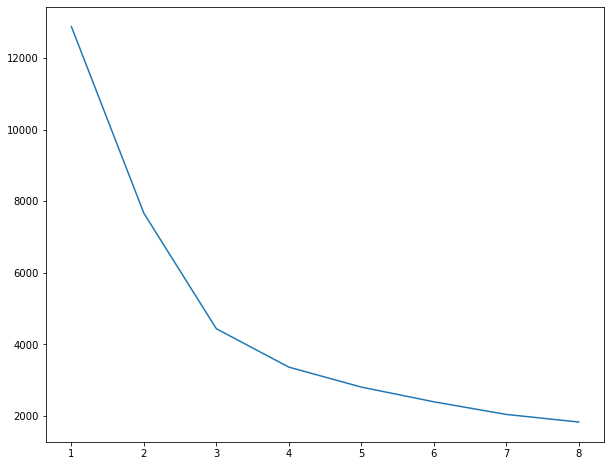

In [75]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

### Silhouette Analysis

\begin{equation*}
silhouette \space score=\frac{p−q}{max(p,q)}
\end{equation*}
 
p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

- The value of the silhouette score range lies between -1 to 1.

- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [76]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.48132884121548086
For n_clusters=5, the silhouette score is 0.466103965297297
For n_clusters=6, the silhouette score is 0.41695075101487755
For n_clusters=7, the silhouette score is 0.41595833548087463
For n_clusters=8, the silhouette score is 0.40947717970268144


In [77]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

In [79]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0


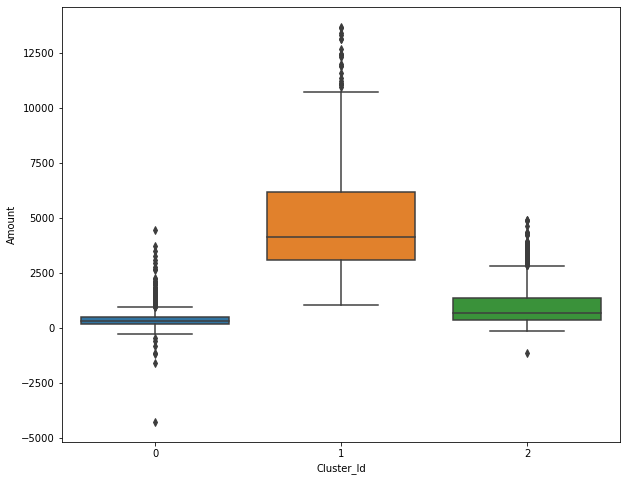

In [80]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)


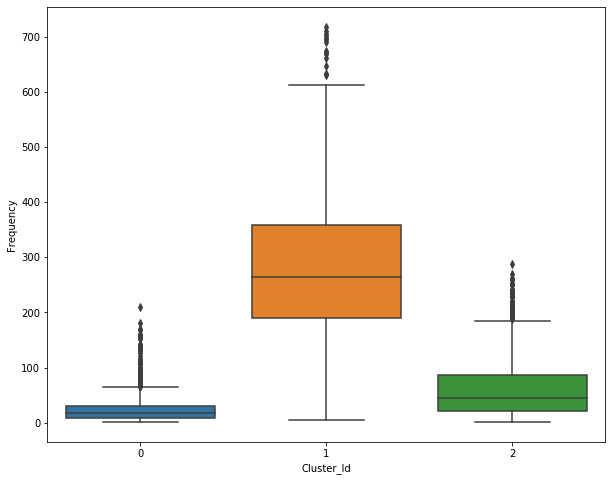

In [81]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

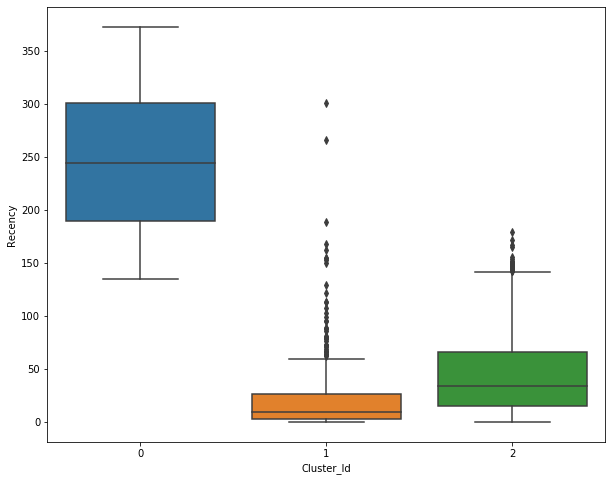

In [82]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

### Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering:

- Divisive
- Agglomerative.

#### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

<img src="attachment:image.png" width="300"/>

In [85]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

RecursionError: maximum recursion depth exceeded while calling a Python object

#### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

<img src="attachment:image.png" width="300"/>

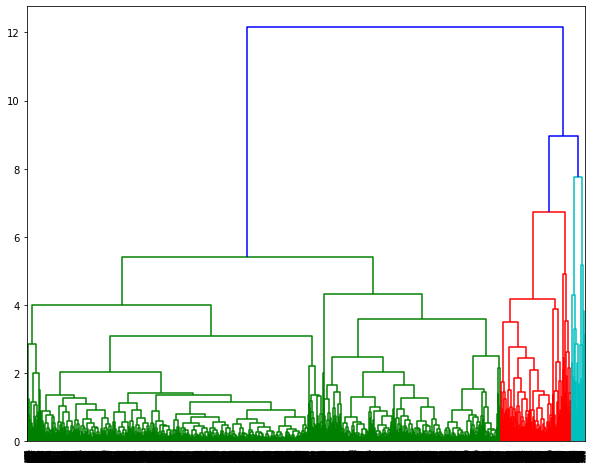

In [84]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Average Linkage:

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

<img src="attachment:image.png" width="300"/>

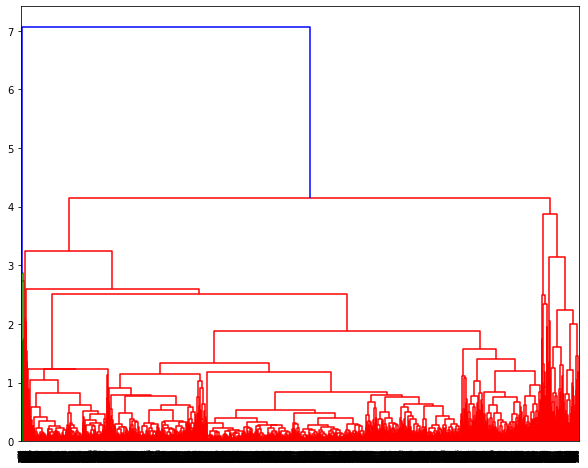

In [86]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

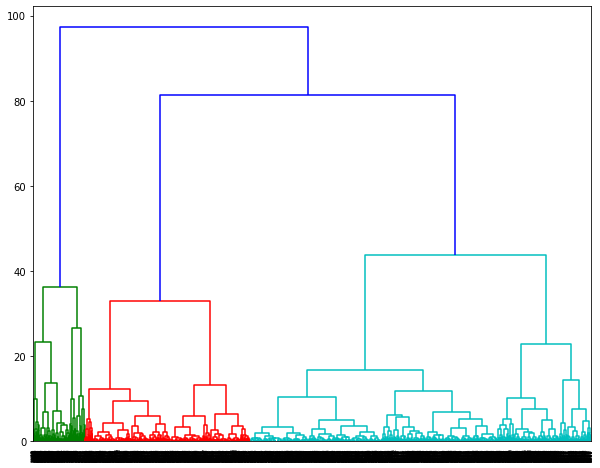

In [87]:
# Ward linkage

mergings = linkage(rfm_df_scaled, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

##### Cutting the Dendrogram based on K

In [67]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 2, ..., 0, 2, 2])

In [68]:
"""
ward_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
complete_clust = AgglomerativeClustering(n_clusters=3, linkage='complete')
avg_clust = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster_labels = avg_clust.fit_predict(rfm_df_scaled)
"""

"\nward_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')\ncomplete_clust = AgglomerativeClustering(n_clusters=3, linkage='complete')\navg_clust = AgglomerativeClustering(n_clusters=3, linkage='average')\ncluster_labels = avg_clust.fit_predict(rfm_df_scaled)\n"

In [69]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.000000e+00,2,325,2,0
1,12347.0,4.310000e+03,182,1,0,1
2,12348.0,1.797240e+03,31,74,1,2
3,12349.0,1.757550e+03,73,18,1,2
4,12350.0,3.344000e+02,17,309,2,0
5,12352.0,1.545410e+03,95,35,1,2
6,12353.0,8.900000e+01,4,203,2,0
7,12354.0,1.079400e+03,58,231,2,0
8,12355.0,4.594000e+02,13,213,2,0
9,12356.0,2.811430e+03,59,22,1,1


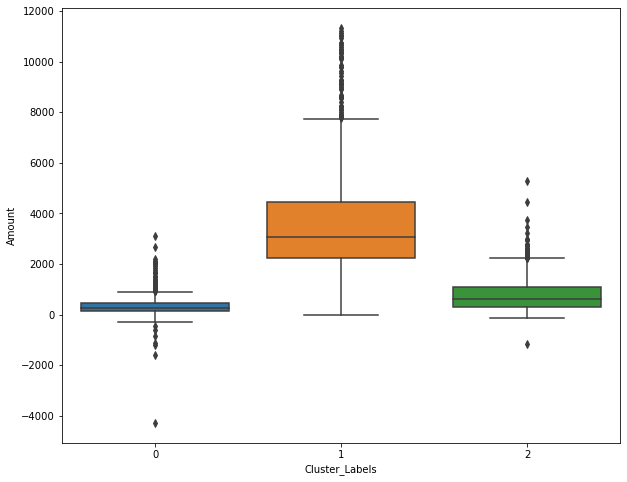

In [70]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

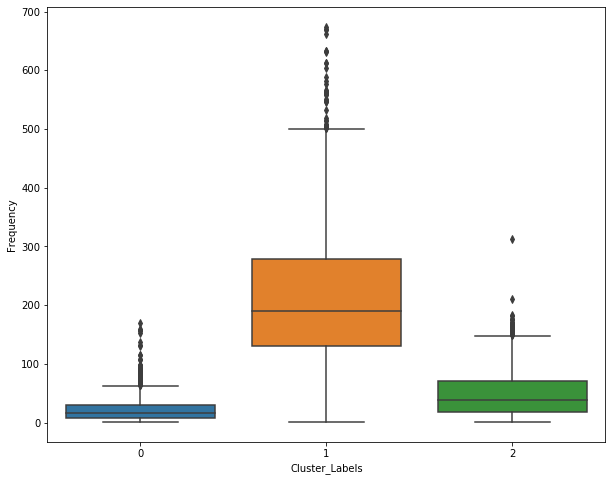

In [71]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

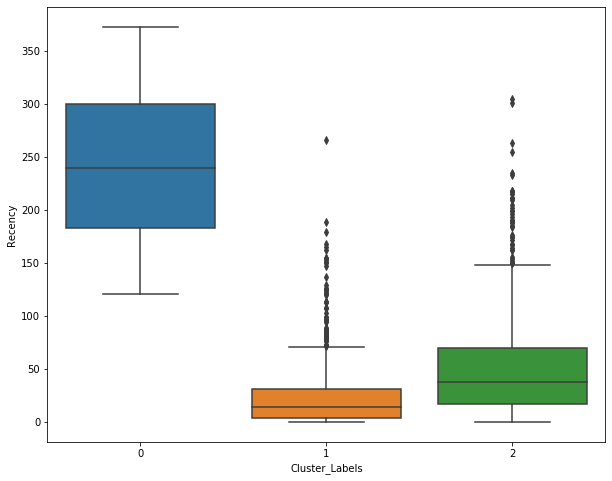

In [72]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

## Analysis

### Inference:
#### ***Cluster labels inference can change on each run
#### K-Means Clustering with 3 Cluster Ids

- Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 0 are frequent buyers.
- Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

#### Hierarchical Clustering with 3 Cluster Labels

- Customers with Cluster_Labels 1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster_Labels 1 are frequent buyers.
- Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.
